> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

### Questions to be asked from this movie data are as follows:
1. Which movie have highest and lowest profit?
2. Which movie have low and high budget?=
3. Which production house has produced most movies?
4. What is the Number of movies released in each month?
5. What is the total profit by year per production house?
6. which year has the highest release of movies?
7. Year of release vs Profitability?
8. Top 10 movies which earn highest profit.

In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [228]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data
df = pd.read_csv('tmdb-movies.csv')
print(df.shape)
df.head(3)

(10866, 21)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [229]:
# checking the data types of features
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [230]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [231]:
# Checking null values in each feature.
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [232]:
df.duplicated().sum()

1

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

### Cleaning:
* There is no need of id feature as we have given imdb_id.
* Drop id, homepage, tagline, budget_adj, revenue_adj, overview, vote_average
* We can remove 'tt' from imdb_id feature to convert its data type from object to int for further analysis.
* Chnage release_date datatype from object to datetime.
* Change realeae_year datatype from int64 to datetime.* Remove Duplicated value
* Budget and Revenue column has 0 min . 25%, 50%. how come this is possible 
* Why runtime have 0 min()

### Tidying:
* There is pipe (|) in cast, genre, production_companies. Solve this issue.


In [233]:
# Deleting columns which has no significance in analysing the current data for provindg answers to asked questions.
df = df.drop(['id', 'homepage', 'tagline','overview', 'vote_average', 'budget_adj', 'revenue_adj', 'keywords'], axis = 1, inplace=False)

In [234]:
print(df.shape)
df.head(1)

(10866, 13)


,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,release_year
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,2015


In [235]:
df.columns[df.isnull().any()]

Index(['imdb_id', 'cast', 'director', 'genres', 'production_companies'], dtype='object')

In [236]:
# Display rows with one or more NaN values in dataframe
df[df.isnull().any(axis=1)]

,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,release_year
228,tt1618448,0.584363,0,0,Racing Extinction,Elon Musk|Jane Goodall|Louie Psihoyos|Leilani ...,Louie Psihoyos,90,Adventure|Documentary,NaN,1/24/15,36,2015
259,tt5133572,0.476341,0,0,Crown for Christmas,Danica McKellar|Rupert Penry-Jones|Ellie Botte...,Alex Zamm,84,TV Movie,NaN,11/27/15,10,2015
295,tt5133810,0.417191,0,0,12 Gifts of Christmas,Katrina Law|Donna Mills|Aaron O'Connell|Melani...,Peter Sullivan,84,Family|TV Movie,NaN,11/26/15,12,2015
298,tt3826866,0.370258,0,0,The Girl in the Photographs,Kal Penn|Claudia Lee|Kenny Wormald|Toby Heming...,Nick Simon,95,Crime|Horror|Thriller,NaN,9/14/15,10,2015
328,tt3090670,0.367617,0,0,Advantageous,Jacqueline Kim|James Urbaniak|Freya Adams|Ken ...,Jennifer Phang,92,Science Fiction|Drama|Family,NaN,6/23/15,29,2015
370,tt2545428,0.314199,0,2334228,Meru,Conrad Anker|Grace Chin|Jimmy Chin|Amee Hinkley,Jimmy Chin|Elizabeth Chai Vasarhelyi,89,Adventure|Documentary,NaN,1/25/15,42,2015
371,tt4661600,0.422901,0,0,Sanjay's Super Team,NaN,Sanjay Patel,7,Animation,Pixar Animation Studios,11/25/15,47,2015
374,tt1015471,0.302474,0,0,The Sisterhood of Night,Kara Hayward|Georgie Henley|Olivia DeJonge|Lau...,Caryn Waechter,104,Mystery|Drama|Thriller,NaN,4/10/15,25,2015
382,tt4145304,0.295946,0,0,Unexpected,Cobie Smulders|Gail Bean|Anders Holm|Elizabeth...,Kris Swanberg,90,Drama|Comedy,NaN,7/24/15,22,2015
388,tt2016335,0.289526,700000,0,Walter,Andrew J. West|Justin Kirk|Virginia Madsen|Wil...,Anna Mastro,87,Drama|Comedy,NaN,3/13/15,12,2015


In [237]:
# Replacing 0 with NAN so that i can drop al na values
df[['budget', 'revenue']] = df[['budget','revenue']].replace(0, np.nan)

In [238]:
df.dropna(subset=['budget','revenue'], inplace=True)
df.isnull().sum()

imdb_id                  0
popularity               0
budget                   0
revenue                  0
original_title           0
cast                     4
director                 1
runtime                  0
genres                   0
production_companies    46
release_date             0
vote_count               0
release_year             0
dtype: int64

In [239]:
df[df.isnull().any(axis = 1)]

,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,release_year
1758,tt1331064,0.118533,1000000.0,1296971.0,Paper Heart,Michael Cera|Charlyne Yi|Jake Johnson|Gill Sum...,Nicholas Jasenovec,88,Comedy|Drama|Romance,NaN,7/31/09,17,2009
1797,tt0981042,0.182881,2500000.0,352810.0,Like Dandelion Dust,Mira Sorvino|Barry Pepper|Cole Hauser|Kate Lev...,Jon Gunn,100,Drama|Family,NaN,2/5/09,11,2009
1800,tt1220628,0.190162,7000000.0,1429299.0,I Hope They Serve Beer in Hell,Matt Czuchry|Jesse Bradford|Marika Dominczyk|T...,Bob Gosse,106,Comedy|Drama,NaN,9/25/09,11,2009
1871,tt1489167,0.092519,31192.0,10000.0,Down Terrace,Robert Hill|Robin Hill|Julia Deakin|David Scha...,Ben Wheatley,89,Drama|Action|Comedy,NaN,9/1/09,15,2009
2303,tt1572491,0.181532,7000000.0,3218666.0,Balada triste de trompeta,Santiago Segura|Antonio de la Torre|RaÃºl ArÃ©...,Ãlex de la Iglesia,101,Drama|Action|Thriller|Foreign,NaN,12/17/10,44,2010
2782,tt0265632,0.501163,10000000.0,44460850.0,Recess: School's Out,Rickey D'Shon Collins|Jason Davis|Ashley Johns...,Chuck Sheetz,83,Animation|Comedy|Family,NaN,1/27/01,42,2001
2805,tt0258273,0.251798,250000.0,4186931.0,Lovely & Amazing,Catherine Keener|Brenda Blethyn|Emily Mortimer...,Nicole Holofcener,91,Comedy|Drama|Romance,NaN,8/31/01,10,2001
2840,tt0242587,0.185009,700000.0,1667192.0,L.I.E. Long Island Expressway,Paul Dano|Bruce Altman|Brian Cox|Billy Kay|Jam...,Michael Cuesta,97,Drama,NaN,1/20/01,13,2001
3047,tt0976247,0.518011,6000000.0,69497.0,"Surfer, Dude",Matthew McConaughey|Jeffrey Nordling|Willie Ne...,S.R. Bindler,85,Comedy,NaN,9/5/08,13,2008
3077,tt1018785,0.451304,27000000.0,44352417.0,The Sisterhood of the Traveling Pants 2,Alexis Bledel|Amber Tamblyn|America Ferrera|Bl...,Sanaa Hamri,117,Adventure|Comedy|Drama|Family,NaN,8/6/08,127,2008


In [240]:
# Change release_date datatype from object to datetime.
df.release_date = pd.to_datetime(df.release_date)
df.revenue = df.revenue.astype(int)
df.budget = df.budget.astype(int)
# Bit confused if do i really need to change dataype of release_year

In [241]:
# Making a profit column for answering question regarding profits.
df['profit'] = df['revenue'] - df['budget']
df.profit = df.profit.astype(int)
df.head(1)

,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,release_year,profit
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,2015,1363528810


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 Which movie have highest and lowest profit?

In [242]:
df.iloc[[df.profit.idxmax()]]

,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,release_year,profit
4020,tt0300532,0.548844,25000000,51842679,Blue Crush,Kate Bosworth|Matthew Davis|Michelle Rodriguez...,John Stockwell,104,Adventure,Imagine Entertainment|Mikona Productions GmbH ...,2002-08-08,96,2002,26842679


In [243]:
df.loc[[df.profit.idxmin()]]

,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,release_year,profit
2244,tt1032751,0.25054,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,74,2010,-413912431


### Research Question 2. Which movie have low and high budget?

In [244]:
df.iloc[[df.budget.idxmax()]]

,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,release_year,profit
6556,tt0317219,3.941265,120000000,461983149,Cars,Owen Wilson|Paul Newman|Bonnie Hunt|Larry the ...,John Lasseter|Joe Ranft,117,Animation|Adventure|Comedy|Family,Walt Disney Pictures|Pixar Animation Studios,2006-06-08,2336,2006,341983149


In [245]:
df.iloc[[df.budget.idxmin()]]

,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,release_year,profit
7418,tt0478311,1.640237,30000000,219076518,Knocked Up,Seth Rogen|Katherine Heigl|Leslie Mann|Paul Ru...,Judd Apatow,129,Comedy|Romance|Drama,Universal Pictures|Apatow Productions,2007-06-01,746,2007,189076518


### Research Question 3. Which production house has produced most movies?


In [246]:
df.production_companies.value_counts().idxmax(),  df.production_companies.value_counts().max()

('Paramount Pictures', 77)

### Research Question 4. What is the Number of movies released in each year? 

In [247]:
df.release_year.value_counts()

2011    199
2013    180
2010    179
2009    174
2006    169
2008    167
2014    165
2007    165
2005    163
2015    160
2012    158
2004    147
2002    127
2003    121
2001    121
1999    116
2000    106
1998     92
1997     90
1996     86
1995     81
1993     72
1994     62
1988     57
1990     53
1992     53
1989     51
1991     50
1986     48
1987     46
1984     42
1985     41
1983     31
1981     30
1982     26
1980     23
1977     19
1978     17
1979     16
1976     15
1971     13
1967     13
1974     13
1973     12
1970     11
1961     10
1975      9
1968      9
1972      8
1964      7
1962      7
1963      6
1965      5
1966      5
1960      5
1969      4
Name: release_year, dtype: int64

### Research Question 5. What is the total profit by year per production house?

In [248]:
df.groupby(['production_companies', 'release_year'])[['profit']].sum()

profit
production_companies                               release_year           
10th Hole Productions|Benaroya Pictures|Four of... 2010           -4376180
120dB Films|Scion Films|Voodoo Production Servi... 2011               1377
1492 Pictures|Dune Entertainment|Fox 2000 Pictu... 2013           84578751
1492 Pictures|Warner Bros.|Heyday Films            2001          851475550
1492 Pictures|Warner Bros.|Heyday Films|MIRACLE... 2002          776688482
1492 Pictures|Warner Bros.|Heyday Films|P of A ... 2004          659804554
1818|Lone Wolf McQuade Associates|Topkick Produ... 1983            7232628
20th Century Fox                                   1975          111692319
                                                   1977            7800000
                                                   1982           37977250
                                                   1987             532286
                                                   1988           75173635
                                                   1990          -28576611
                                                   1992           53088552
                                                   1993           -2716629
                                                   1995           51000000
                                                   1997           25332015
                                                   1998           31108773
                                                   2003           -7077834
                                                   2004          -19394237
                                                   2006           24360014
                                                   2007           10342161
                                                   2010           67238796
                                                   2011          399523423
                                                   2013           46546518
                                                   2014          127912430
20th Century Fox|1492 Pictures                     2001          -69590483
20th Century Fox|Chernin Entertainment|Walden M... 2012           94772232
20th Century Fox|Davis Entertainment               1988           14433275
20th Century Fox|Double Feature Films|Appian Wa... 2013           32616646
...                                                                    ...
WingNut Films|Universal Pictures|Big Primate Pi... 2005          343000000
Wonderland Sound and Vision|CBS Films|Vast Ente... 2015           35028634
Woods Entertainment|Dimension Films                1996          159046663
Working Dog|Village Roadshow Entertainment         1997              75114
Working Title Films                                2014          106201940
                                                   2015            5122090
Working Title Films|Circle Films                   1991           -2846061
Working Title Films|Cross Creek Pictures|Anton ... 2015           17972994
Worldview Entertainment                            2014           -5967749
                                                   2015          -13839427
Worldview Entertainment|Arcade Pictures            2013           -3990779
Worldview Entertainment|Dragonfly Entertainment... 2014            1833445
Worldview Entertainment|Muskat Filmed Propertie... 2014           -1634533
Worldview Entertainment|New Regency Pictures|TS... 2014           85215094
Yari Film Group                                    2005            8718595
Yari Film Group|Furst Films                        2006           -7617733
Yash Raj Films                                     2006           35396427
Zenith Entertainment|Initial Pictures|U.K. Prod... 1986           -1173477
Zentropa Entertainments|Danmarks Radio (DR)|Art... 2005          -13525082
Zentropa Entertainments|Det Danske Filminstitut... 2009          -10208133
Zininsa Film Production|Intellectual Properties... 2008            -959412
Zoetrope Studios  

### Research Question 6. Which year has the highest release of movies?

In [249]:
top_10 = df.groupby('release_year').count()[['imdb_id']].sort_values('imdb_id',ascending=False).head(25)

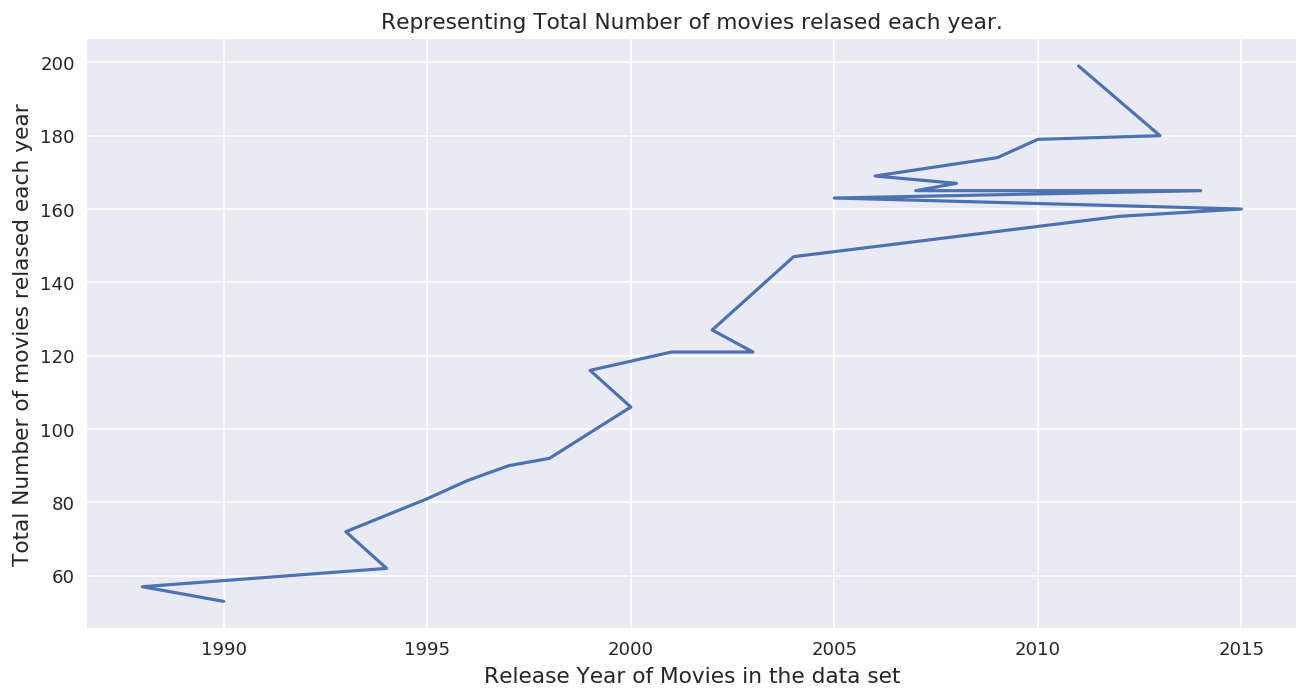

In [250]:
plt.figure(figsize=(12,6), dpi = 130)
plt.plot(top_10)
plt.xlabel('Release Year of Movies in the data set', fontsize = 12)
plt.ylabel('Total Number of movies relased each year', fontsize = 12)
plt.title('Representing Total Number of movies relased each year.');

### Research Question 7 : Last 25 Year of release vs Profitability

In [251]:
profit_years = df.groupby('release_year')['profit'].sum()
profit_years.head(5)

release_year
1960    108198052
1961    299083188
1962    166879846
1963    115411882
1964    294678387
Name: profit, dtype: int64

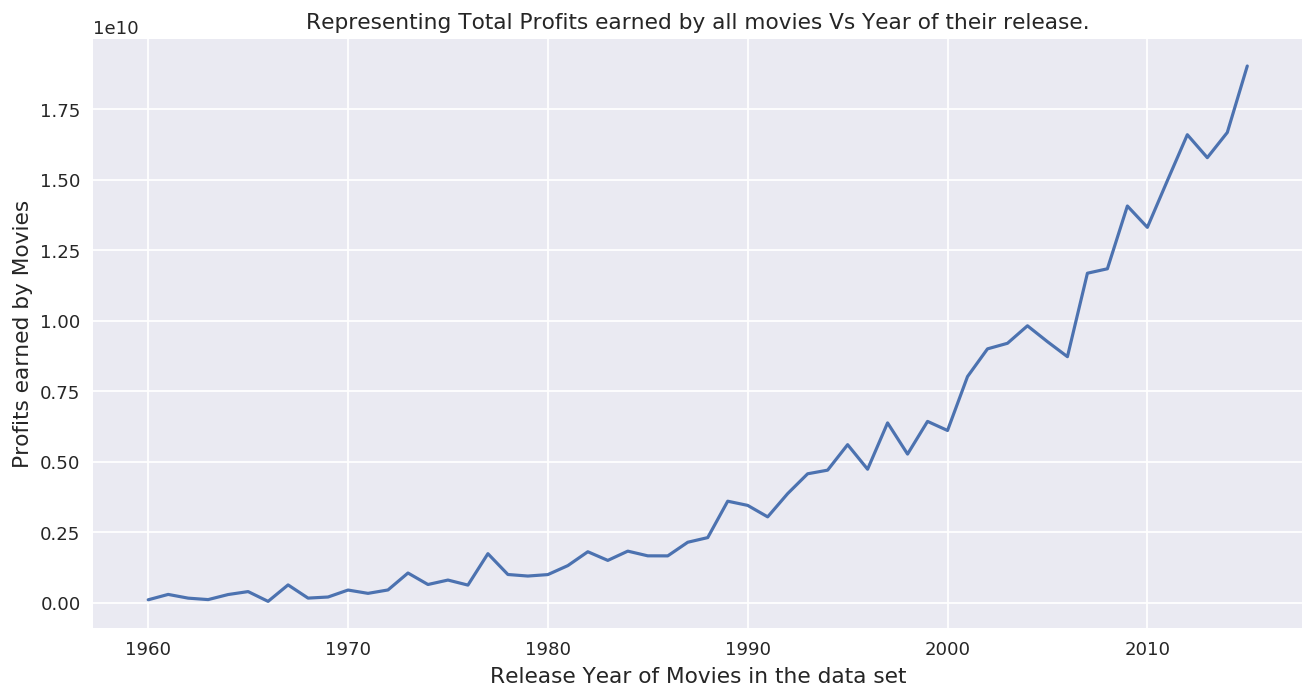

In [252]:
plt.figure(figsize=(12,6), dpi = 130)
plt.plot(profit_years)
plt.xlabel('Release Year of Movies in the data set', fontsize = 12)
plt.ylabel('Profits earned by Movies', fontsize = 12)
plt.title('Representing Total Profits earned by all movies Vs Year of their release.');

### Research Question 8. Top 10 movies which earn highest profit.

In [253]:
top10_profit = df[['profit']].sort_values('profit',ascending=False)
top10_profit['original_title'] = df['original_title']
top10_profit.head()

,profit,original_title
1386,2544505847,Avatar
3,1868178225,Star Wars: The Force Awakens
5231,1645034188,Titanic
0,1363528810,Jurassic World
4,1316249360,Furious 7


In [260]:
data = list(map(str,(top10_profit['original_title'])))
x = top10_profit['profit'][:10]
y = top10_profit['original_title'][:10]
x,y

(1386    2544505847
 3       1868178225
 5231    1645034188
 0       1363528810
 4       1316249360
 4361    1299557910
 3374    1202817822
 14      1125035767
 5422    1124219009
 8094    1084279658
 Name: profit, dtype: int64,
 1386                                          Avatar
 3                       Star Wars: The Force Awakens
 5231                                         Titanic
 0                                     Jurassic World
 4                                          Furious 7
 4361                                    The Avengers
 3374    Harry Potter and the Deathly Hallows: Part 2
 14                           Avengers: Age of Ultron
 5422                                          Frozen
 8094                                         The Net
 Name: original_title, dtype: object)

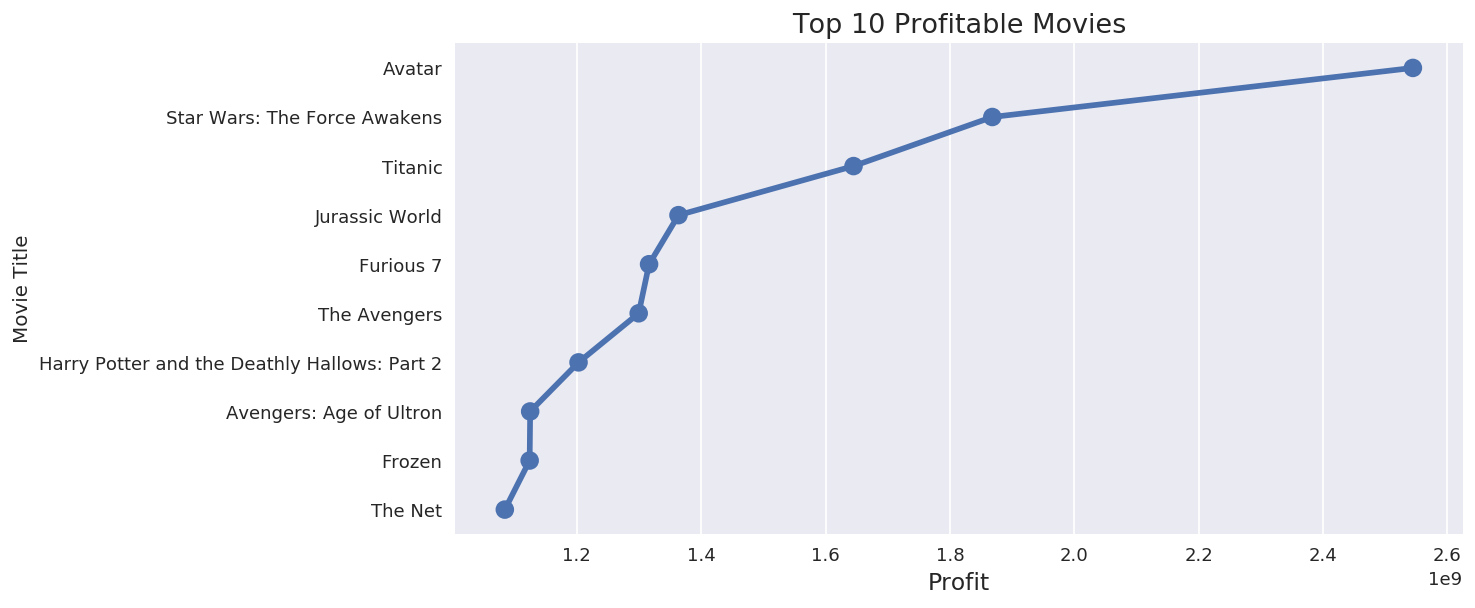

In [269]:
plt.figure(figsize=(10,5), dpi=130)
sns.pointplot(x = x, y = y)

plt.title("Top 10 Profitable Movies",fontsize = 15)
plt.xlabel("Profit",fontsize = 13)
plt.ylabel("Movie Title");

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [270]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0